In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import tensorflow as tf
from sklearn.metrics import confusion_matrix, classification_report

## DATA

In [74]:
data = pd.read_csv('../eeg-feature-extractor/dataset/generated_data/final_data.csv')

In [75]:
data

,lag1_mean_0,lag1_mean_1,lag1_mean_2,lag1_mean_3,lag1_mean_d_h2h1_0,lag1_mean_d_h2h1_1,lag1_mean_d_h2h1_2,lag1_mean_d_h2h1_3,lag1_mean_q1_0,lag1_mean_q1_1,...,freq_669_3,freq_679_3,freq_689_3,freq_699_3,freq_709_3,freq_720_3,freq_730_3,freq_740_3,freq_750_3,Label
0,26.292077,32.865077,24.845962,-29.259269,1.859933,-6.586517,-5.309462,0.140703,20.156937,35.783887,...,1.674765e-17,6.620091e-18,9.930137e-18,6.103422e-18,1.309457e-17,5.879300e-18,2.134915e-17,2.134915e-17,1.046728e-17,0.0
1,40.414769,36.639808,-11.793885,19.249423,2.725221,3.546885,-63.829962,3.445867,36.493201,31.565469,...,1.474801e-17,1.645999e-17,1.671107e-17,8.184104e-18,1.782514e-17,1.524509e-17,1.507436e-17,1.750167e-17,9.034666e-18,2.0
2,21.640560,31.894480,51.054680,14.980480,5.415337,7.765861,10.268994,6.634474,19.995210,27.456562,...,1.077673e-17,5.636804e-18,1.655023e-17,8.889491e-18,2.072416e-17,1.220684e-17,9.621933e-18,1.193454e-17,3.005587e-17,1.0
3,23.828120,23.808600,23.886680,4.863320,-3.913736,-0.259066,3.497041,-0.726529,25.791326,22.918067,...,1.726309e-17,5.967269e-18,2.960595e-18,1.837373e-17,2.649329e-17,5.921189e-18,2.134915e-17,6.620091e-18,7.489778e-17,0.0
4,28.164080,3.828240,-13.671800,12.558640,-20.869651,2.120110,-2.088518,-2.340146,42.671140,1.937435,...,1.727201e-17,1.330757e-17,5.178562e-18,1.098441e-17,7.806727e-18,8.950904e-18,1.376756e-17,6.103422e-18,1.036869e-17,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25359,27.519480,25.195360,32.167920,20.195360,3.559557,9.178611,-3.560455,1.761258,29.326666,20.897914,...,3.774758e-17,2.847409e-17,5.967269e-18,2.155345e-17,1.184238e-17,2.590520e-18,6.620091e-18,1.067458e-17,2.368476e-17,0.0
25360,23.925769,35.794769,18.742500,-7.887692,-7.853884,-8.783306,0.505312,-1.733541,25.950468,37.251835,...,4.186913e-18,1.850372e-17,4.186913e-18,5.967269e-18,2.386908e-17,1.674765e-17,2.960595e-18,1.814497e-17,2.960595e-17,0.0
25361,17.277692,15.418346,3.211346,3.418000,1.517070,-5.450715,6.147702,-7.824086,19.560808,23.383188,...,1.831027e-17,1.924387e-17,1.067458e-17,1.509613e-17,4.026844e-17,1.324018e-17,1.132814e-17,1.324018e-17,3.019226e-17,1.0
25362,25.578346,35.494346,-83.195654,19.343385,5.524716,2.726764,-40.781198,-6.550431,24.883060,31.300122,...,8.853308e-18,9.612761e-18,3.518444e-18,1.393073e-17,5.298658e-18,8.709656e-18,1.985424e-17,8.334893e-18,1.866951e-17,2.0


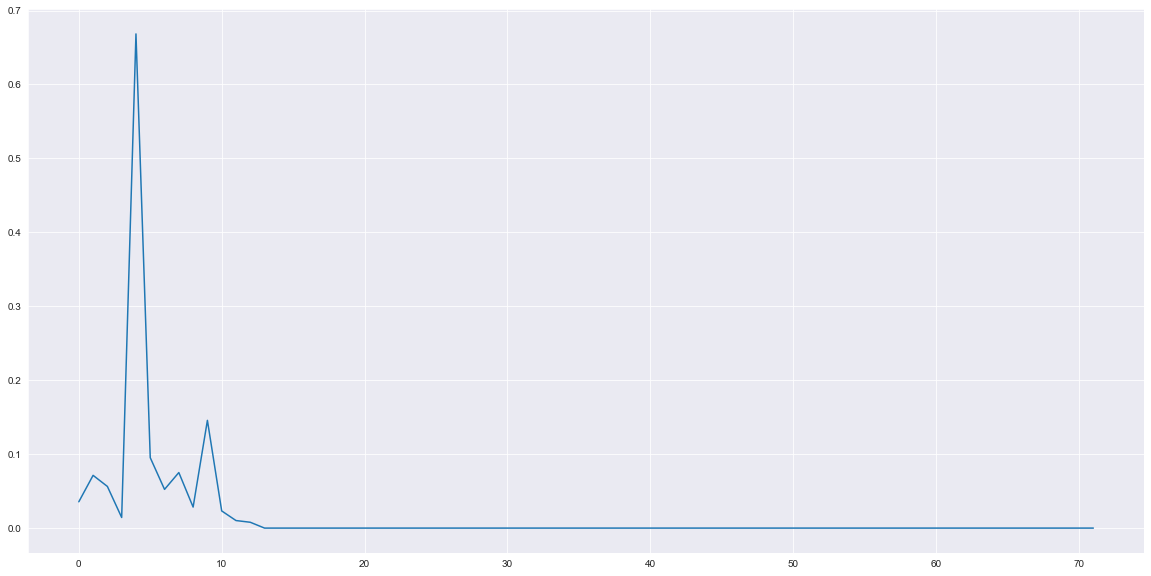

In [70]:
#Visualization Example (of 1 row of data, and visualizing only the FFTs):
sample = data.loc[0,'freq_010_0':'freq_750_0']
x_label = []
for i,s in enumerate(sample.keys()):
    x_label.append(s.replace("freq_0","").replace("freq_","").replace("_0",""))

plt.figure(figsize=(20,10))
plt.plot(range(len(sample)), sample)
#plt.xlabel(xlabel= x_label)
plt.show()

In [66]:
#Looking at max frequencies of each channel
row = 2

freq_0_ = data.loc[row,'freq_010_0':'freq_750_0']
freq_0_position = np.argmax(freq_0_)

freq_1_ = data.loc[row,'freq_010_1':'freq_750_1']
freq_1_position = np.argmax(freq_1_)

freq_2_ = data.loc[row,'freq_010_2':'freq_750_2']
freq_2_position = np.argmax(freq_2_)

freq_3_ = data.loc[row,'freq_010_3':'freq_750_3']
freq_3_position = np.argmax(freq_3_)

freq_0_.index[freq_0_position], freq_1_.index[freq_1_position] , freq_2_.index[freq_2_position], freq_3_.index[freq_3_position]

('freq_010_0', 'freq_010_1', 'freq_010_2', 'freq_010_3')

In [5]:
# To train only on the FFTs frequencies
x_freq = data.loc[:, 'freq_010_0':'freq_750_3']

In [6]:
#Unique Value Counts from each target:
data['Label'].value_counts()

2.0    8506
1.0    8477
0.0    8381
Name: Label, dtype: int64

In [10]:
X = data.drop('Label', axis=1).copy()
y = data['Label'].copy()

#This is to select between ALL FEATURES (including statistical values and FFTs) vs just FFTs features:
#Comment one and uncomment the other to use either one:

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=123)
#X_train, X_test, y_train, y_test = train_test_split(x_freq, y, train_size=0.8, random_state=123)

# Splitting the data

In [8]:
#Mapping the Targets to Specific Label:

label_mapping = {0:"Relaxed", 1:"Neutral", 2:"Concentrating"}

states = list(label_mapping.values())

# 1st Model: GRU

In [177]:
inputs = tf.keras.Input(shape=(X_train.shape[1],))
K = len(set(y_train.unique()))

expand_dims = tf.expand_dims(inputs, axis=2)

gru = tf.keras.layers.GRU(256, return_sequences=True)(expand_dims)
#gru = tf.keras.layers.GRU(128, return_sequences=True)(gru)
flatten = tf.keras.layers.Flatten()(gru)
outputs = tf.keras.layers.Dense(K, activation='softmax')(flatten)


model = tf.keras.Model(inputs=inputs, outputs=outputs)
print(model.summary())

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 288)]             0         
                                                                 
 tf.expand_dims_3 (TFOpLambd  (None, 288, 1)           0         
 a)                                                              
                                                                 
 gru_3 (GRU)                 (None, 288, 256)          198912    
                                                                 
 flatten_13 (Flatten)        (None, 73728)             0         
                                                                 
 dense_11 (Dense)            (None, 3)                 221187    
                                                                 
Total params: 420,099
Trainable params: 420,099
Non-trainable params: 0
_____________________________________________________

In [178]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history = model.fit(X_train,y_train,validation_split=0.2,batch_size=128,epochs=50,
    callbacks=[
        tf.keras.callbacks.EarlyStopping(
            monitor='val_loss',
            patience=3,
            restore_best_weights=True
        )
    ],
    verbose = 1
)

Epoch 1/50
127/127 [==============================] - 8s 44ms/step - loss: 0.8936 - accuracy: 0.7084 - val_loss: 0.6464 - val_accuracy: 0.7859
Epoch 2/50
127/127 [==============================] - 5s 41ms/step - loss: 0.5541 - accuracy: 0.7926 - val_loss: 0.5042 - val_accuracy: 0.7933
Epoch 3/50
127/127 [==============================] - 5s 41ms/step - loss: 0.4578 - accuracy: 0.8073 - val_loss: 0.4354 - val_accuracy: 0.8120
Epoch 4/50
127/127 [==============================] - 5s 41ms/step - loss: 0.3936 - accuracy: 0.8239 - val_loss: 0.3606 - val_accuracy: 0.8364
Epoch 5/50
127/127 [==============================] - 5s 41ms/step - loss: 0.3512 - accuracy: 0.8436 - val_loss: 0.3320 - val_accuracy: 0.8463
Epoch 6/50
127/127 [==============================] - 5s 41ms/step - loss: 0.3373 - accuracy: 0.8483 - val_loss: 0.3273 - val_accuracy: 0.8399
Epoch 7/50
127/127 [==============================] - 5s 41ms/step - loss: 0.3227 - accuracy: 0.8553 - val_loss: 0.3151 - val_accuracy: 0.8505

## GRU: Results

In [181]:
model_acc = model.evaluate(X_test, y_test, verbose=0)[1]
print("Test Accuracy: {:.3f}%".format(model_acc * 100))

Test Accuracy: 93.298%


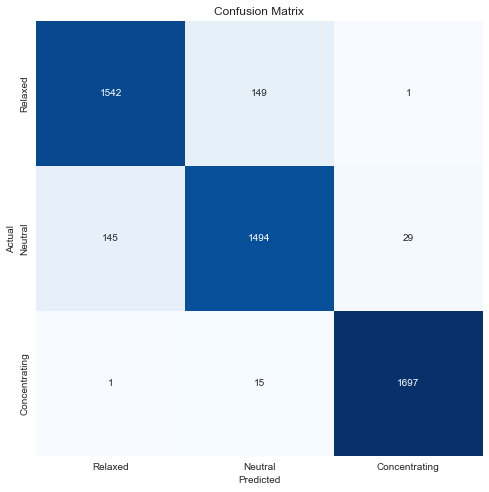

Classification Report:
----------------------
               precision    recall  f1-score   support

         0.0       0.91      0.91      0.91      1692
         1.0       0.90      0.90      0.90      1668
         2.0       0.98      0.99      0.99      1713

    accuracy                           0.93      5073
   macro avg       0.93      0.93      0.93      5073
weighted avg       0.93      0.93      0.93      5073



In [182]:
y_pred = np.array(list(map(lambda x: np.argmax(x), model.predict(X_test))))

cm = confusion_matrix(y_test, y_pred)
clr = classification_report(y_test, y_pred)

plt.figure(figsize=(8, 8))
sns.heatmap(cm, annot=True, vmin=0, fmt='g', cbar=False, cmap='Blues')
plt.xticks(np.arange(3) + 0.5,states )
plt.yticks(np.arange(3) + 0.5,states)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

print("Classification Report:\n----------------------\n", clr)

## 2nd Model: SVM

In [183]:
from sklearn import svm

svm_row_amount = 1000

svm_x = X_train[0:svm_row_amount]
svm_y = y_train[0:svm_row_amount]

svm_classifier = svm.SVC(kernel="linear", gamma="auto", C=2)
svm_classifier.fit(svm_x,svm_y)

SVC(C=2, gamma='auto', kernel='linear')

In [184]:
#Predictions on SVM:

y_pred_svm = svm_classifier.predict(X_test[0:svm_row_amount])
y_test_svm = y_test[0:svm_row_amount]

### SVM: Results

In [185]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test_svm, y_pred_svm)*100

85.7

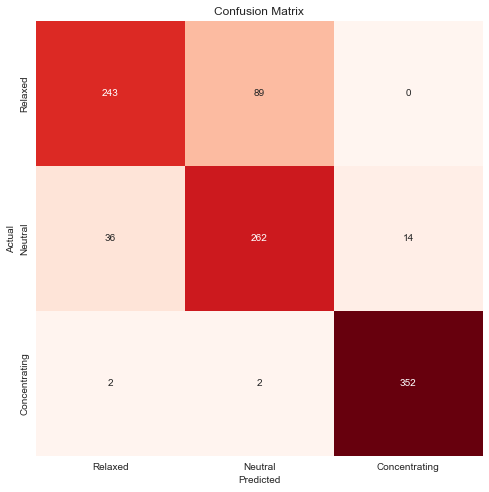

Classification Report:
----------------------
               precision    recall  f1-score   support

         0.0       0.86      0.73      0.79       332
         1.0       0.74      0.84      0.79       312
         2.0       0.96      0.99      0.98       356

    accuracy                           0.86      1000
   macro avg       0.86      0.85      0.85      1000
weighted avg       0.86      0.86      0.86      1000



In [187]:
cm_svm = confusion_matrix(y_test_svm, y_pred_svm)
clr_svm = classification_report(y_test_svm, y_pred_svm)

plt.figure(figsize=(8, 8))
sns.heatmap(cm_svm, annot=True, vmin=0, fmt='g', cbar=False, cmap='Reds')
plt.xticks(np.arange(3) + 0.5,states)
plt.yticks(np.arange(3) + 0.5,states)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

print("Classification Report:\n----------------------\n", clr_svm)

## 3rd Model: Random Forest Classifier

In [188]:
# Fitting Random Forest Classification to the Training set
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 42)
rfc.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=42)

In [189]:
y_pred_rfc = rfc.predict(X_test)

### RFC: Results

In [190]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred_rfc)*100

89.69051843090872

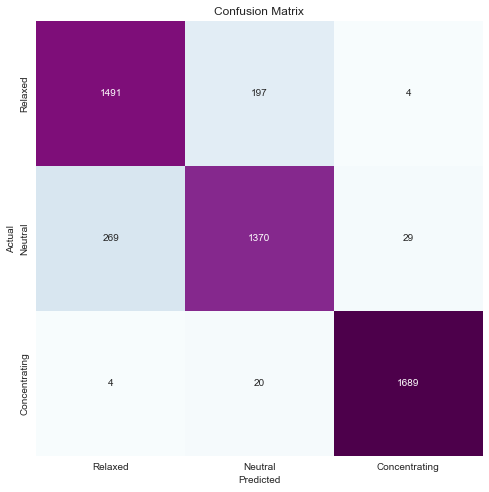

Classification Report:
----------------------
               precision    recall  f1-score   support

         0.0       0.85      0.88      0.86      1692
         1.0       0.86      0.82      0.84      1668
         2.0       0.98      0.99      0.98      1713

    accuracy                           0.90      5073
   macro avg       0.90      0.90      0.90      5073
weighted avg       0.90      0.90      0.90      5073



In [191]:
cm_rfc = confusion_matrix(y_test, y_pred_rfc)
clr_rfc = classification_report(y_test, y_pred_rfc)

plt.figure(figsize=(8, 8))
sns.heatmap(cm_rfc, annot=True, vmin=0, fmt='g', cbar=False, cmap='BuPu')
plt.xticks(np.arange(3) + 0.5,states)
plt.yticks(np.arange(3) + 0.5,states)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

print("Classification Report:\n----------------------\n", clr_rfc)

## 4th Model: 1D Convolutional Neural Network

In [192]:
X_train.shape

(20291, 288)

In [193]:
X_train_CNN = np.array(X_train).reshape(X_train.shape[0], X_train.shape[1], 1)
X_test_CNN = np.array(X_test).reshape(X_test.shape[0], X_test.shape[1], 1)
X_train_CNN.shape

(20291, 288, 1)

In [194]:
import keras
from keras.layers import Conv1D, Dropout, MaxPooling1D, Flatten, Dense

input_shape = (X_train_CNN.shape[1],X_train_CNN.shape[2])

model = keras.models.Sequential()
model.add(Conv1D(filters=64, kernel_size=2, activation='relu', input_shape = input_shape))
model.add(Conv1D(filters=64, kernel_size=2, activation='relu'))
model.add(Dropout(0.5))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(3, activation='softmax'))

model.summary()

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_24 (Conv1D)          (None, 287, 64)           192       
                                                                 
 conv1d_25 (Conv1D)          (None, 286, 64)           8256      
                                                                 
 dropout_10 (Dropout)        (None, 286, 64)           0         
                                                                 
 max_pooling1d_10 (MaxPoolin  (None, 143, 64)          0         
 g1D)                                                            
                                                                 
 flatten_14 (Flatten)        (None, 9152)              0         
                                                                 
 dense_12 (Dense)            (None, 3)                 27459     
                                                     

In [195]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history = model.fit(X_train,y_train,validation_split=0.2,batch_size=128,epochs=50,
    callbacks=[
        tf.keras.callbacks.EarlyStopping(
            monitor='val_accuracy',
            patience=3,
            restore_best_weights=True
        )
    ],
    verbose = 1
)

Epoch 1/50
127/127 [==============================] - 2s 11ms/step - loss: 0.5578 - accuracy: 0.7719 - val_loss: 0.3483 - val_accuracy: 0.8421
Epoch 2/50
127/127 [==============================] - 1s 8ms/step - loss: 0.3285 - accuracy: 0.8547 - val_loss: 0.3117 - val_accuracy: 0.8748
Epoch 3/50
127/127 [==============================] - 1s 8ms/step - loss: 0.3087 - accuracy: 0.8640 - val_loss: 0.2932 - val_accuracy: 0.8820
Epoch 4/50
127/127 [==============================] - 1s 8ms/step - loss: 0.2911 - accuracy: 0.8781 - val_loss: 0.2855 - val_accuracy: 0.8918
Epoch 5/50
127/127 [==============================] - 1s 8ms/step - loss: 0.2816 - accuracy: 0.8832 - val_loss: 0.2748 - val_accuracy: 0.8933
Epoch 6/50
127/127 [==============================] - 1s 8ms/step - loss: 0.2711 - accuracy: 0.8880 - val_loss: 0.2706 - val_accuracy: 0.8965
Epoch 7/50
127/127 [==============================] - 1s 7ms/step - loss: 0.2632 - accuracy: 0.8958 - val_loss: 0.2622 - val_accuracy: 0.8965
Epoch

In [196]:
y_pred_CNN = model.predict(X_test)

### CNN: Results

In [197]:
model_acc_cnn = model.evaluate(X_test, y_test, verbose=0)[1]
print("Test Accuracy: {:.3f}%".format(model_acc_cnn * 100))

Test Accuracy: 91.504%


In [198]:
y_pred_CNN = np.array(list(map(lambda x: np.argmax(x), y_pred_CNN)))
accuracy_score(y_test, y_pred_CNN)

0.9150404100137985

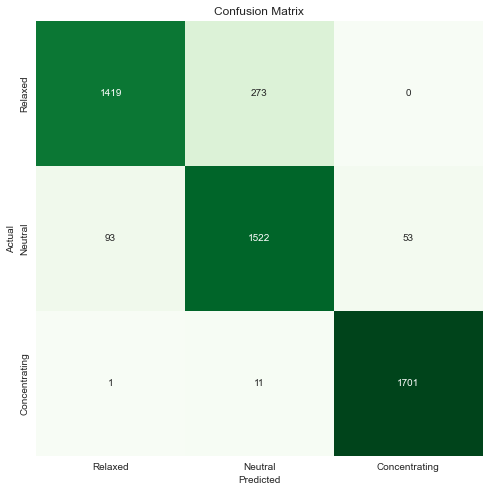

Classification Report:
----------------------
               precision    recall  f1-score   support

         0.0       0.94      0.84      0.89      1692
         1.0       0.84      0.91      0.88      1668
         2.0       0.97      0.99      0.98      1713

    accuracy                           0.92      5073
   macro avg       0.92      0.91      0.91      5073
weighted avg       0.92      0.92      0.91      5073



In [199]:
cm_cnn = confusion_matrix(y_test, y_pred_CNN)
clr_cnn = classification_report(y_test, y_pred_CNN)

plt.figure(figsize=(8, 8))
sns.heatmap(cm_cnn, annot=True, vmin=0, fmt='g', cbar=False, cmap='Greens')
plt.xticks(np.arange(3) + 0.5,states)
plt.yticks(np.arange(3) + 0.5,states)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

print("Classification Report:\n----------------------\n", clr_cnn)

In [ ]:
#End